In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_udemy = pd.read_csv("Datasets/udemy_courses.csv")
df_udemy.head(1)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance


# Analisis de variables

### General

### ID, Titulo, URL

In [4]:
df_udemy[['course_id','course_title','url']]

,course_id,course_title,url
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...
...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...


Dado que que el analisis no estará centrado en hacer conclusiones sobre un curso puntual sino a una generalizacion de ellos según distintas características y segmentaciones que realicemos, se cree conveniente eliminar la fila de los ID y el URL, ya que con ambas tendremos información redundante sobre caracteristicas puntuales y especificas que no contribuyen al analisis. Se decide dejar el titulo ya que posteriormente se solicita un analisis de palabras del mismo, sumado a que facilita la informacion sobre el topico del curso.

### IS_PAID

In [5]:
df_udemy['is_paid'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3678 entries, 0 to 3677
Series name: is_paid
Non-Null Count  Dtype
--------------  -----
3678 non-null   bool 
dtypes: bool(1)
memory usage: 3.7 KB


In [6]:
df_udemy['is_paid'].describe()

count     3678
unique       2
top       True
freq      3368
Name: is_paid, dtype: object

In [7]:
# Calculamos el porcentaje de True y False en la columna
porcentaje_true = df_udemy['is_paid'].value_counts(normalize=True)[True] * 100
porcentaje_false = df_udemy['is_paid'].value_counts(normalize=True)[False] * 100

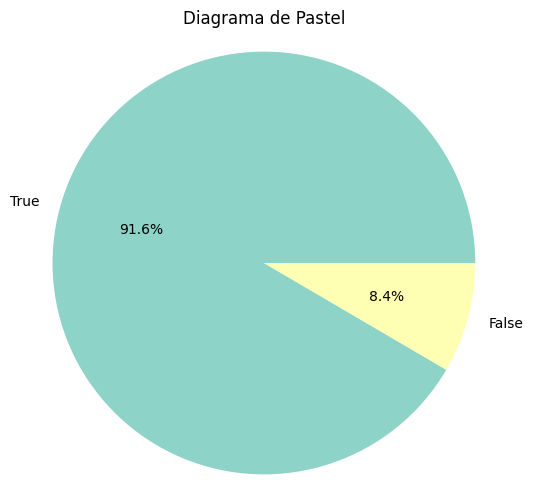

In [8]:
# Creamos el gráfico de pastel
plt.figure(figsize=(6, 6))  # Tamaño del gráfico
sns.set_palette('Set3')  # Paleta de colores para las categorías
plt.pie([porcentaje_true, porcentaje_false], labels=['True', 'False'], autopct='%1.1f%%')  # Creación del gráfico de pastel
plt.axis('equal')  # Ajuste del aspecto para que sea un círculo en lugar de una elipse
plt.title('Diagrama de Pastel')  # Título del gráfico
plt.show()  # Mostrar el gráfico


In [9]:
df_udemy['is_paid'].value_counts()

True     3368
False     310
Name: is_paid, dtype: int64

In [10]:
# Contamos la cantidad de True y False en la columna
cantidad_true = df_udemy['is_paid'].value_counts()[True]
cantidad_false = df_udemy['is_paid'].value_counts()[False]

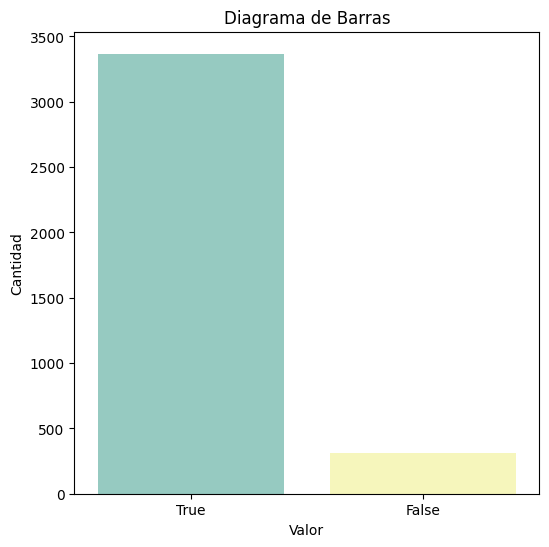

In [11]:
# Creamos el gráfico de barras
plt.figure(figsize=(6, 6))  # Tamaño del gráfico
sns.set_palette('Set3')  # Paleta de colores para las barras
sns.barplot(x=['True', 'False'], y=[cantidad_true, cantidad_false])  # Creación del gráfico de barras
plt.title('Diagrama de Barras')  # Título del gráfico
plt.xlabel('Valor')  # Etiqueta del eje x
plt.ylabel('Cantidad')  # Etiqueta del eje y
plt.show()  # Mostrar el gráfico

La columna "is_paid" es una columna booleana que devuelve True si es pago o False si no lo es. Decido conservar la columna para posteriores analisis, ya que me facilitara la obtencion de metricas referidas a identificar los suscriptores pagos de los que no, y la popularidad de los cursos. Puede llegar a ser redundante con "price", pero no tengo la info necesaria aún para definir eso. En heatmap se volverá a analizar.
Respecto a la informacion que me brinda, la gran maora de cursos es pago, y no se observan valores nulos.

### Price

In [12]:
df_udemy['price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3678 entries, 0 to 3677
Series name: price
Non-Null Count  Dtype
--------------  -----
3678 non-null   int64
dtypes: int64(1)
memory usage: 28.9 KB


In [13]:
df_udemy['price'].describe()

count    3678.000000
mean       66.049483
std        61.005755
min         0.000000
25%        20.000000
50%        45.000000
75%        95.000000
max       200.000000
Name: price, dtype: float64

In [14]:
df_udemy['price'].value_counts()

20     830
50     468
0      310
200    295
40     217
30     166
25     154
95     152
100    133
195    127
35     116
150     88
45      83
75      81
60      75
120     37
55      35
85      31
125     30
65      30
80      29
145     27
70      26
90      19
180     17
115     16
175     13
105     11
190     10
140     10
110      8
135      8
165      6
185      6
170      5
160      4
130      3
155      2
Name: price, dtype: int64

In [15]:
df_udemy['price'].unique()

array([200,  75,  45,  95, 150,  65, 195,  30,  20,  50, 175, 140, 115,
       190, 125,  60, 145, 105, 155, 185, 180, 120,  25, 160,  40,   0,
       100,  90,  35,  80,  70,  55, 165, 130,  85, 170, 110, 135],
      dtype=int64)

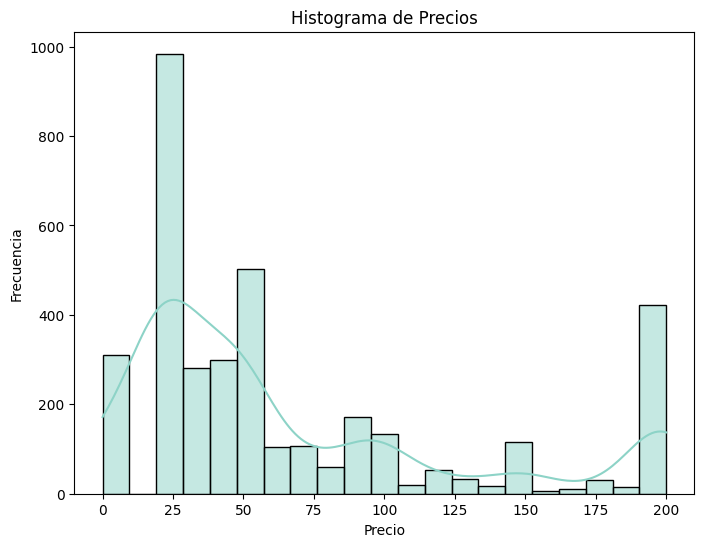

In [16]:
# Creamos el histograma
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.histplot(data=df_udemy, x='price', kde=True)  # Creación del histograma
plt.title('Histograma de Precios')  # Título del gráfico
plt.xlabel('Precio')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.show()  # Mostrar el gráfico


In [17]:
df_udemy[df_udemy['price'] == 0].count()

course_id              310
course_title           310
url                    310
is_paid                310
price                  310
num_subscribers        310
num_reviews            310
num_lectures           310
level                  310
content_duration       310
published_timestamp    310
subject                310
dtype: int64

In [18]:
df_udemy[df_udemy['is_paid'] == False].count()

course_id              310
course_title           310
url                    310
is_paid                310
price                  310
num_subscribers        310
num_reviews            310
num_lectures           310
level                  310
content_duration       310
published_timestamp    310
subject                310
dtype: int64

Esta columna numerica de los precios, me será muy util. Podre calcular las ventas, multiplicando el precio por los matriculados para posteriormente obtener nuevas metricas. Ademas, podría categorizar los precios en rangos para ver la popularidad de cada uno de estos segmentos.

Se puede apreciar que los cursos no pagos, son la misma cantidad de cursos con precio cero.

Se puede observar, gran frecuencia en los cursos con precio mas bajo y mas altos, se observa por ende una distribucion bimodal.

Este campo, sera parte de metricas y segmentaciones posteriores. Es de la columna mas importantes.

No presenta valores nulos.

### Numero de suscriptos

In [19]:
df_udemy['num_subscribers'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3678 entries, 0 to 3677
Series name: num_subscribers
Non-Null Count  Dtype
--------------  -----
3678 non-null   int64
dtypes: int64(1)
memory usage: 28.9 KB


In [20]:
df_udemy['num_subscribers'].describe()

count      3678.000000
mean       3197.150625
std        9504.117010
min           0.000000
25%         111.000000
50%         911.500000
75%        2546.000000
max      268923.000000
Name: num_subscribers, dtype: float64

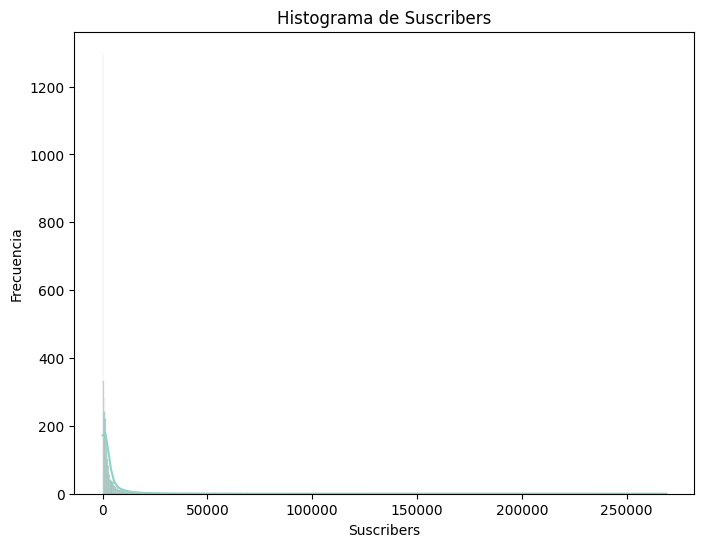

In [21]:
# Creamos el histograma
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.histplot(data=df_udemy, x='num_subscribers', kde=True)  # Creación del histograma
plt.title('Histograma de Suscribers')  # Título del gráfico
plt.xlabel('Suscribers')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.show()  # Mostrar el gráfico

In [22]:
# Filtrar los valores del DataFrame para que estén entre cero y 25000
df_filtrado = df_udemy[(df_udemy['num_subscribers'] >= 0) & (df_udemy['num_subscribers'] <= 15000)]


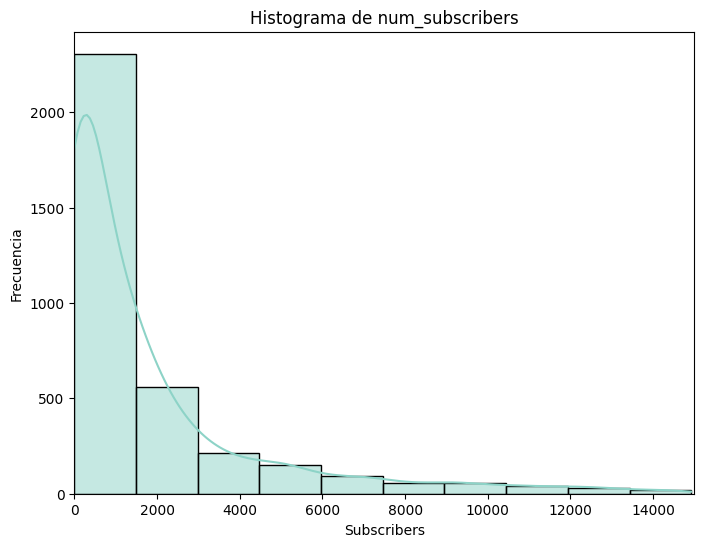

In [23]:
# Creamos el histograma
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.histplot(data=df_filtrado, x='num_subscribers', bins=10, kde=True)  # Creación del histograma
plt.title('Histograma de num_subscribers')  # Título del gráfico
plt.xlabel('Subscribers')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.xlim(0, 15000)  # Limitar el rango del eje x
plt.show()  # Mostrar el gráfico


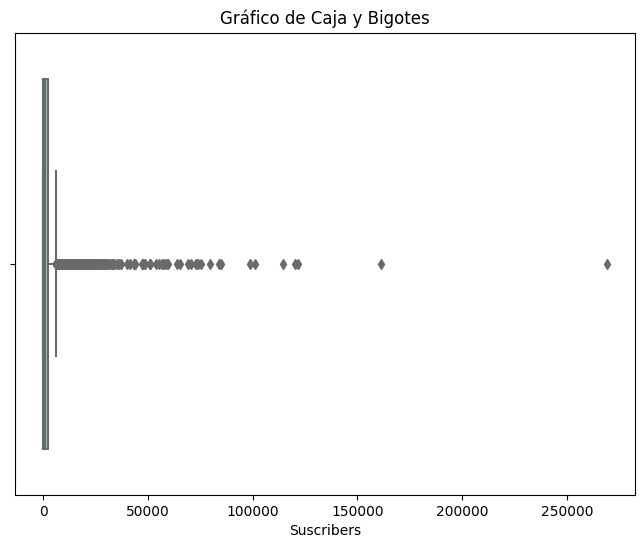

In [24]:
# Creamos el gráfico de caja y bigotes
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.boxplot(x=df_udemy['num_subscribers'])  # Creación del gráfico de caja y bigotes
plt.title('Gráfico de Caja y Bigotes')  # Título del gráfico
plt.xlabel('Suscribers')  # Etiqueta del eje x
#plt.xlim(0, 5000)  # Limitar el rango del eje x
plt.show()  # Mostrar el gráfico


Esta columna informa sobre la cantidad de suscriptos que tiene cada curso.
La columna de suscriptores es una columna importante para el posterior analisis, ya que es la fuente de los ingresos de la empresa. Estara involucrada en casi todas las metricas y tambien sera parte de la columna de ventas (precio x suscriptores).
Podemos observar que la mayor parte de los cursos, se encuentran en el rango de 0 a 8000 suscriptores, a pesar de que haya cursoso con mas de 200.000, estos son excepcionales, por lo que podrian a ser llegados consideras outliers.

### Numero de comentarios

In [25]:
df_udemy['num_reviews'].describe()

count     3678.000000
mean       156.259108
std        935.452044
min          0.000000
25%          4.000000
50%         18.000000
75%         67.000000
max      27445.000000
Name: num_reviews, dtype: float64

In [26]:
df_udemy['num_reviews'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3678 entries, 0 to 3677
Series name: num_reviews
Non-Null Count  Dtype
--------------  -----
3678 non-null   int64
dtypes: int64(1)
memory usage: 28.9 KB


In [27]:
df_udemy['num_reviews'].value_counts()

0       289
1       184
2       166
3       160
4       127
       ... 
820       1
655       1
1017      1
848       1
1716      1
Name: num_reviews, Length: 511, dtype: int64

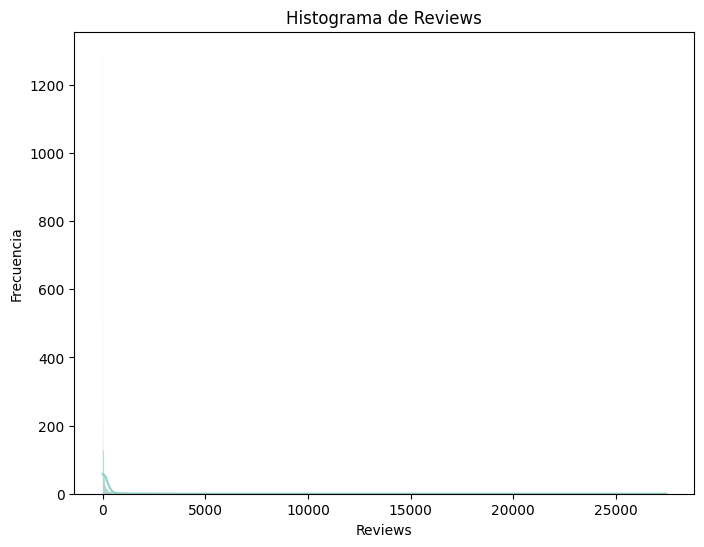

In [28]:
# Creamos el histograma
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.histplot(data=df_udemy, x='num_reviews', kde=True)  # Creación del histograma
plt.title('Histograma de Reviews')  # Título del gráfico
plt.xlabel('Reviews')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.show()  # Mostrar el gráfico

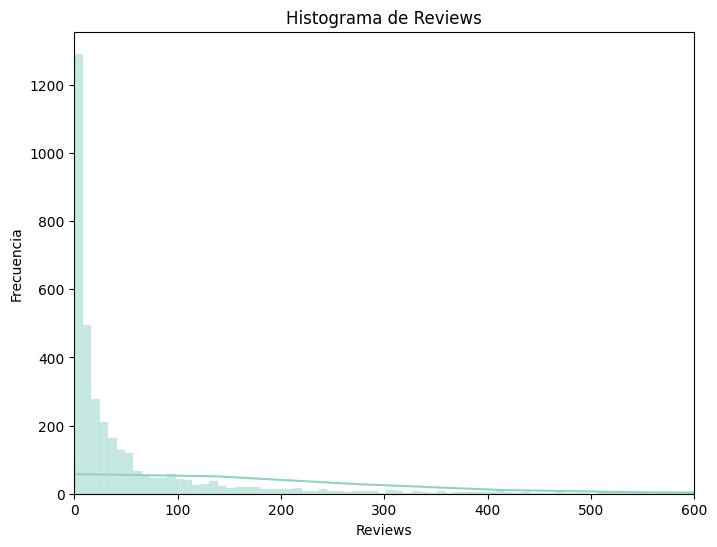

In [29]:
# Creamos el histograma
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.histplot(data=df_udemy, x='num_reviews', kde=True)  # Creación del histograma
plt.title('Histograma de Reviews')  # Título del gráfico
plt.xlabel('Reviews')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.xlim(0, 600)  # Limitar el rango del eje x
plt.show()  # Mostrar el gráfico

Esta columna me brinda la cantidad de comentarios realizados a cada curso.
Esta columna presenta similitudes con el numero de suscriptos, posee una distribucion similar, y el mismo tipo de outliers.
Es probable que la misma sea descartada por redundante posteriormente, cuando se haga el heatmap.

### Numero de clases

In [30]:
df_udemy['num_lectures'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3678 entries, 0 to 3677
Series name: num_lectures
Non-Null Count  Dtype
--------------  -----
3678 non-null   int64
dtypes: int64(1)
memory usage: 28.9 KB


In [31]:
df_udemy['num_lectures'].describe()

count    3678.000000
mean       40.108755
std        50.383346
min         0.000000
25%        15.000000
50%        25.000000
75%        45.750000
max       779.000000
Name: num_lectures, dtype: float64

In [32]:
# Calcular la frecuencia y el porcentaje de la columna 'col1'
frecuencia = df_udemy['num_lectures'].value_counts()
porcentaje = df_udemy['num_lectures'].value_counts(normalize=True) * 100

# Crear el DataFrame final con el valor, la frecuencia y el porcentaje
df_final = pd.DataFrame({'Valor': frecuencia.index, 'Frecuencia': frecuencia.values, 'Porcentaje': porcentaje.values})
df_final

,Valor,Frecuencia,Porcentaje
0,12,121,3.289831
1,15,109,2.963567
2,13,107,2.909190
3,14,105,2.854812
4,11,104,2.827624
...,...,...,...
224,362,1,0.027189
225,156,1,0.027189
226,202,1,0.027189
227,225,1,0.027189


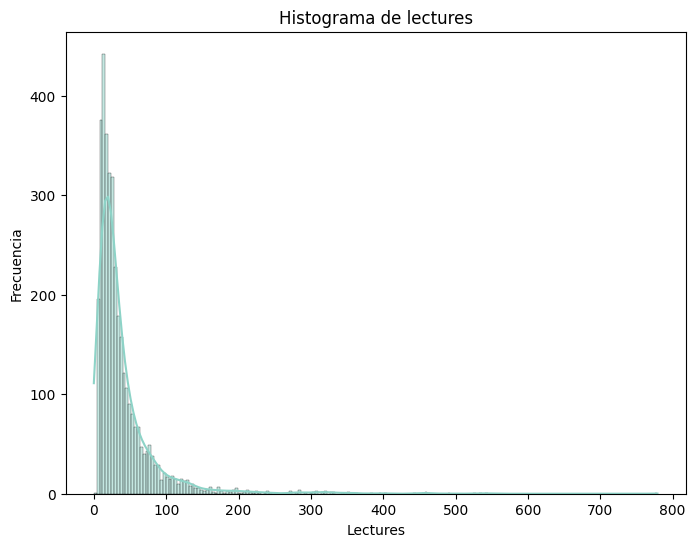

In [33]:
# Creamos el histograma
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.histplot(data=df_udemy, x='num_lectures', kde=True)  # Creación del histograma
plt.title('Histograma de lectures')  # Título del gráfico
plt.xlabel('Lectures')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
#plt.xlim(0, 600)  # Limitar el rango del eje x
plt.show()  # Mostrar el gráfico

El campo num_lecture, presenta la cantidad de lecciones que tiene cada curso. 
Es una medida de la demanda que tomará cada uno; puede ser redundante con la duracion de los mismos.
Presenta una distribucion similar a las dos columnas anteriores, aunque a priori no se perciba relación entre estas. Se analizara posteriormente su correlacion.
La información que brinda esta columna no la veo muy nutritiva para analisis posteriores respecto a las principales variables indicadas por el cliente. 
Se podria vincular la duracion de los cursos con la popularidad de cada uno, para ver que tanto contenido es demandado mayormente.


### Nivel

In [34]:
df_udemy["level"].describe()

count           3678
unique             4
top       All Levels
freq            1929
Name: level, dtype: object

In [35]:
df_udemy["level"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3678 entries, 0 to 3677
Series name: level
Non-Null Count  Dtype 
--------------  ----- 
3678 non-null   object
dtypes: object(1)
memory usage: 28.9+ KB


In [36]:
df_udemy["level"].value_counts()

All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

In [37]:
frecuencia = df_udemy["level"].value_counts()

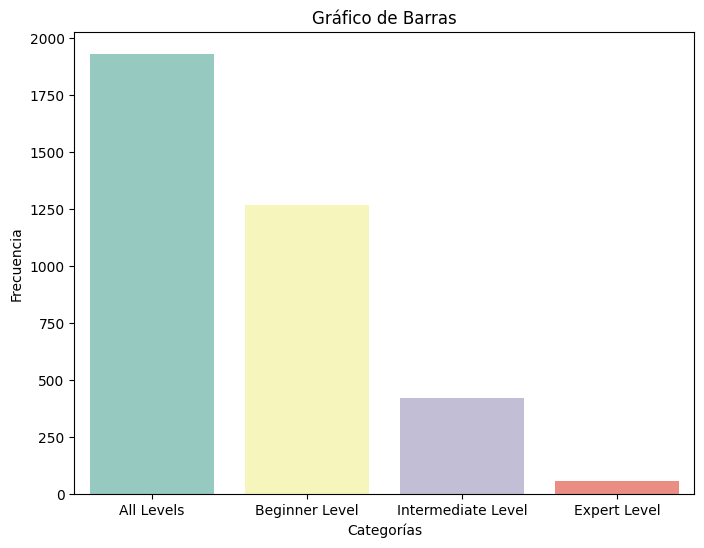

In [38]:
# Crear el gráfico de barras
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.barplot(x=frecuencia.index, y=frecuencia.values)  # Creación del gráfico de barras
plt.title('Gráfico de Barras')  # Título del gráfico
plt.xlabel('Categorías')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.show()  # Mostrar el gráfico

La columna "level" nos brinda informacion sobre la dificultad del curso.
Esta columna ya se encuentra categorizada de manera correcta. 
Es util para la solicitud de segmentacion de ventas y popularidad del cliente.
Se conserva esta columna sin modificaciones a priori.

### Duración

In [39]:
df_udemy['content_duration'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3678 entries, 0 to 3677
Series name: content_duration
Non-Null Count  Dtype  
--------------  -----  
3678 non-null   float64
dtypes: float64(1)
memory usage: 28.9 KB


In [40]:
df_udemy['content_duration'].describe()

count    3678.000000
mean        4.094517
std         6.053840
min         0.000000
25%         1.000000
50%         2.000000
75%         4.500000
max        78.500000
Name: content_duration, dtype: float64

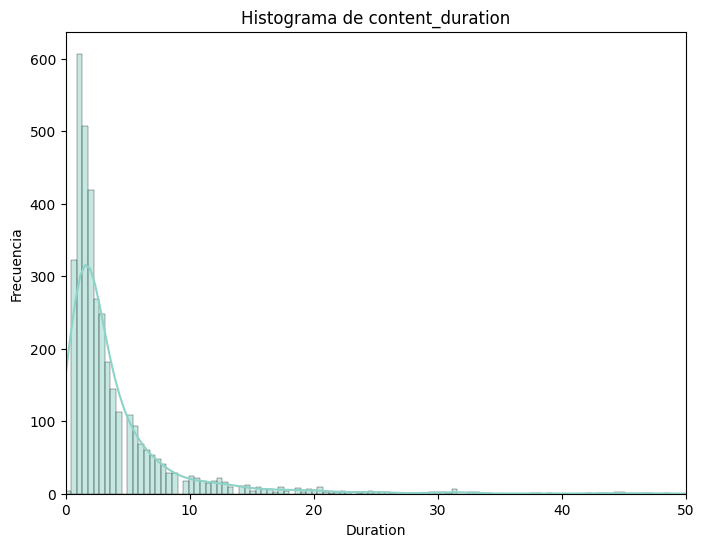

In [41]:
# Creamos el histograma
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.histplot(data=df_udemy, x='content_duration', kde=True)  # Creación del histograma
plt.title('Histograma de content_duration')  # Título del gráfico
plt.xlabel('Duration')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.xlim(0, 50)  # Limitar el rango del eje x
plt.show()  # Mostrar el gráfico

Este campo presenta la duracion en video de cada curso, sus unidades son horas.
Presenta una distribucion similar a "num_suscribers", "num_reviews".
Hay presencia de de outliers.
Podría estar vinculado a la columna "num_lectures", en ambos casos se presenta la demanda del curso al estudiante medida en diferentes unidades. 
Podría eliminarse posteriormente en un heatmap.

### Fecha de publicación

In [42]:
df_udemy['published_timestamp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3678 entries, 0 to 3677
Series name: published_timestamp
Non-Null Count  Dtype 
--------------  ----- 
3678 non-null   object
dtypes: object(1)
memory usage: 28.9+ KB


In [43]:
df_udemy['published_timestamp'].describe()

count                     3678
unique                    3672
top       2017-07-02T14:29:35Z
freq                         2
Name: published_timestamp, dtype: object

In [44]:
df_udemy['published_timestamp'].isnull().sum()

0

In [45]:
# Obtener los duplicados de la columna 'columna'
duplicados = df_udemy[df_udemy['published_timestamp'].duplicated()]
valores_duplicados = duplicados['published_timestamp'].unique()
print(valores_duplicados)

['2016-05-16T18:28:30Z' '2017-04-23T16:19:01Z' '2016-12-15T14:56:17Z'
 '2017-07-02T14:29:35Z' '2014-04-15T21:48:55Z' '2013-01-03T00:55:31Z']


In [46]:
df_udemy['published_timestamp'].value_counts()

2017-07-02T14:29:35Z    2
2013-01-03T00:55:31Z    2
2014-04-15T21:48:55Z    2
2017-04-23T16:19:01Z    2
2016-05-16T18:28:30Z    2
                       ..
2015-11-16T20:17:05Z    1
2017-05-17T19:19:18Z    1
2017-06-30T05:48:57Z    1
2014-03-31T20:31:04Z    1
2014-09-28T19:51:11Z    1
Name: published_timestamp, Length: 3672, dtype: int64

La columna published_timestamp me brinda informacion sobre la fecha de publicacion de los cursos. La misma será util para plantear como serie de tiempo. Lo que me permitira plantear y evaluar el desarrollo de los kpis que se planteen.

Hay que mencionar la ausencia de nulos, y la presencia de duplicados que deberan ser eliminados. 
Sera necesario tambien cambiar el formato de las fechas, quitando la hora, para que solo quede dd-mm-YYYY. Es probable que en el futuro se deba separar por dia, mes y año.

### Tópico

In [47]:
df_udemy['subject'].describe()

count                3678
unique                  4
top       Web Development
freq                 1200
Name: subject, dtype: object

In [48]:
df_udemy['subject'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3678 entries, 0 to 3677
Series name: subject
Non-Null Count  Dtype 
--------------  ----- 
3678 non-null   object
dtypes: object(1)
memory usage: 28.9+ KB


In [49]:
df_udemy['subject'].value_counts()

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

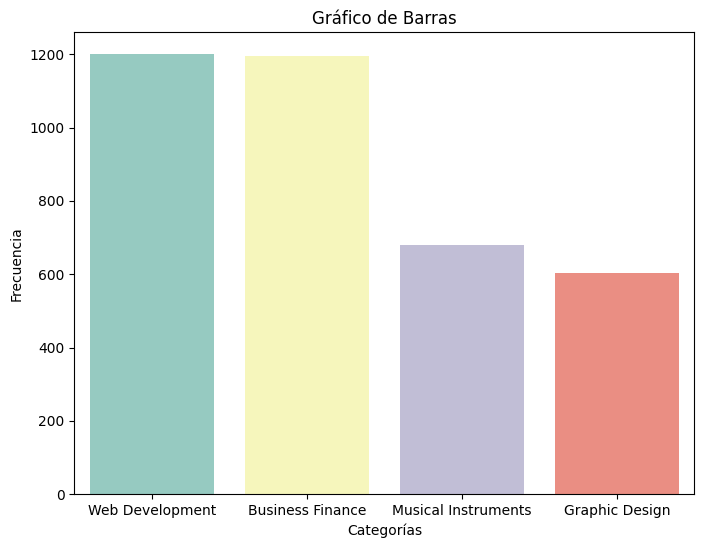

In [50]:
frecuencia = df_udemy['subject'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.barplot(x=frecuencia.index, y=frecuencia.values)  # Creación del gráfico de barras
plt.title('Gráfico de Barras')  # Título del gráfico
plt.xlabel('Categorías')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.show()  # Mostrar el gráfico


La columna subject proporciona informacion en forma de 4 categorias sobre las tematicas de los cursos. Es muy util para realizar una segmentacion de la categoria topico y convertirla en metrica mediante ventas o popularidad.

No se observan nulos.

## Correlaciones

C:\Users\usuario\AppData\Local\Temp\ipykernel_6152\1717850657.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_udemy.corr()


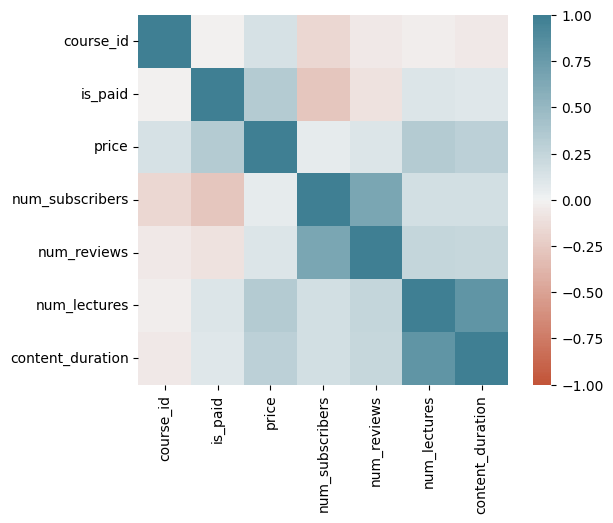

In [51]:
corr_matrix = df_udemy.corr()
ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)


In [52]:
# Crea una tabla con los valores de la matriz de correlación
corr_table = pd.DataFrame(corr_matrix.stack(), columns=['Correlation'])

# Muestra la tabla de correlación
print(corr_table)

                                   Correlation
course_id        course_id            1.000000
                 is_paid             -0.013679
                 price                0.142319
                 num_subscribers     -0.167856
                 num_reviews         -0.058550
                 num_lectures        -0.024646
                 content_duration    -0.057223
is_paid          course_id           -0.013679
                 is_paid              1.000000
                 price                0.328513
                 num_subscribers     -0.266159
                 num_reviews         -0.087471
                 num_lectures         0.112574
                 content_duration     0.094417
price            course_id            0.142319
                 is_paid              0.328513
                 price                1.000000
                 num_subscribers      0.050769
                 num_reviews          0.113696
                 num_lectures         0.330160
             

En el mapa de calor se puede observar una alta correlacion entre los siguientes campos:

num lectures - content duration

num sucribers - num reviews

Como se sospecho anteriormente, se conservarán las columnas  content_duration y num_subsribers, las otras se desecharan.

Además, como se analizo previamente, por se columnas especificas se desechara el id_course y url

In [53]:
drop_columns = ['num_lectures','num_reviews','course_id','url']
df_udemy = df_udemy.drop(drop_columns, axis=1)

In [54]:
df_udemy.head(1)

,course_title,is_paid,price,num_subscribers,level,content_duration,published_timestamp,subject
0,Ultimate Investment Banking Course,True,200,2147,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance


## Registros Duplicados

In [55]:
df_udemy.duplicated().sum()

6

In [56]:
df_udemy[df_udemy.duplicated()]

,course_title,is_paid,price,num_subscribers,level,content_duration,published_timestamp,subject
787,Essentials of money value: Get a financial Life !,True,20,0,All Levels,0.616667,2016-05-16T18:28:30Z,Business Finance
788,Introduction to Forex Trading Business For Beg...,True,20,0,Beginner Level,1.500000,2017-04-23T16:19:01Z,Business Finance
894,Understanding Financial Statements,True,25,0,All Levels,1.000000,2016-12-15T14:56:17Z,Business Finance
1100,CFA Level 2- Quantitative Methods,True,40,0,All Levels,5.500000,2017-07-02T14:29:35Z,Business Finance
1473,MicroStation - Células,True,20,0,Beginner Level,0.616667,2014-04-15T21:48:55Z,Graphic Design
2561,Learn Web Designing & HTML5/CSS3 Essentials in...,True,75,43285,All Levels,4.000000,2013-01-03T00:55:31Z,Web Development


In [57]:
df_udemy = df_udemy.drop_duplicates()

In [58]:
df_udemy.duplicated().sum()

0

Procedemos a eliminar los registros duplicados y reindexamos.

In [59]:
df_udemy = df_udemy.reset_index(drop=True)
df_udemy.shape[0]

3672

## Categorización

### Price

In [60]:
categories = ['0-50', '50-100', '100-150', '150-200']
limits = [-1, 50, 100, 150, 200]


In [61]:
df_udemy['categ_price'] = pd.cut(df_udemy['price'], bins=limits, labels=categories)


In [62]:
df_udemy[['price', 'categ_price']]


,price,categ_price
0,200,150-200
1,75,50-100
2,45,0-50
3,95,50-100
4,200,150-200
...,...,...
3667,100,50-100
3668,25,0-50
3669,40,0-50
3670,50,0-50


In [63]:
df_udemy['categ_price'].value_counts()

0-50       2339
50-100      610
150-200     485
100-150     238
Name: categ_price, dtype: int64

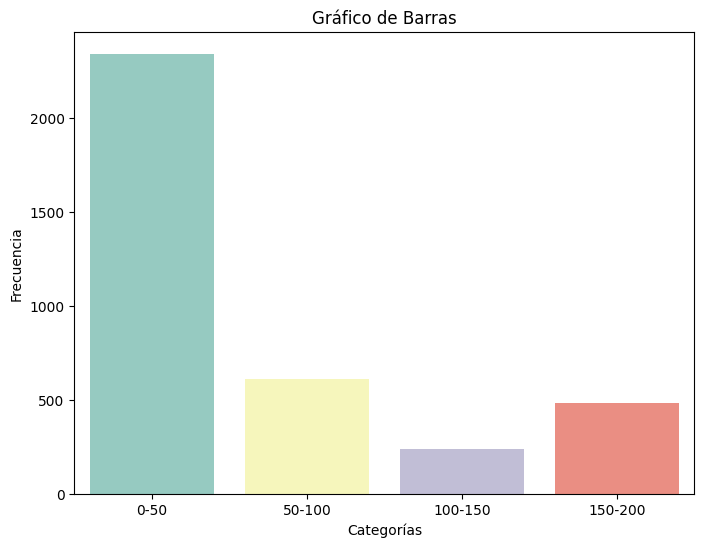

In [64]:
frecuencia = df_udemy['categ_price'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.barplot(x=frecuencia.index, y=frecuencia.values)  # Creación del gráfico de barras
plt.title('Gráfico de Barras')  # Título del gráfico
plt.xlabel('Categorías')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.show()  # Mostrar el gráfico

Procedí a segmentar el precio en 4 categorias para facilitar su evaluacion posterior. Se observa que los cursos de entre '0-50' es decir los mas baratos, son los que tienen mas demanda.

### Content_Duration

In [66]:
df_udemy['content_duration'].count()

3672

In [67]:
df_udemy['content_duration'][(df_udemy['content_duration']>10)].count()

289

In [68]:
289/3672*100

7.87037037037037

Dado el calculo anterior donde las duraciones mayores a 10 horas (que llegan hasta 78.5) se procederá a segmentar esta categoria en 6 partes. Las primeras 5 cada dos horas de duracion, y la ultima para valores mayores a 10hs de duracion.

In [69]:
categories = ['0-2', '2-4', '4-6', '6-8', '8-10', '>10']
limits = [-1, 2, 4, 6, 8, 10, 80]


In [71]:
df_udemy['categ_duration'] = pd.cut(df_udemy['content_duration'], bins=limits, labels=categories)


In [72]:
df_udemy[['content_duration', 'categ_duration']]

,content_duration,categ_duration
0,1.5,0-2
1,39.0,>10
2,2.5,2-4
3,3.0,2-4
4,2.0,0-2
...,...,...
3667,2.0,0-2
3668,3.5,2-4
3669,3.5,2-4
3670,3.0,2-4


Dado que solo interesan las categorias de la duracion, y no el valor especifico de cada curso, y que no se pueden operar con estos valores ya que son descriptivos, se decide elimnar la categoria content duration.

In [73]:
df_udemy = df_udemy.drop(['content_duration'], axis = 1)

In [74]:
df_udemy.head(1)

,course_title,is_paid,price,num_subscribers,level,published_timestamp,subject,categ_price,categ_duration
0,Ultimate Investment Banking Course,True,200,2147,All Levels,2017-01-18T20:58:58Z,Business Finance,150-200,0-2


## Nuevas Columnas

## Ventas

A continuación se creará la columna ventas = price * matriculados. La misma permitira evaluar los ingresos de cada curso y de cada categoria que se desee evaluar.

In [75]:
df_udemy['sales'] = df_udemy['price'] * df_udemy['num_subscribers']
df_udemy.head()

,course_title,is_paid,price,num_subscribers,level,published_timestamp,subject,categ_price,categ_duration,sales
0,Ultimate Investment Banking Course,True,200,2147,All Levels,2017-01-18T20:58:58Z,Business Finance,150-200,0-2,429400
1,Complete GST Course & Certification - Grow You...,True,75,2792,All Levels,2017-03-09T16:34:20Z,Business Finance,50-100,>10,209400
2,Financial Modeling for Business Analysts and C...,True,45,2174,Intermediate Level,2016-12-19T19:26:30Z,Business Finance,0-50,2-4,97830
3,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,All Levels,2017-05-30T20:07:24Z,Business Finance,50-100,2-4,232845
4,How To Maximize Your Profits Trading Options,True,200,1276,Intermediate Level,2016-12-13T14:57:18Z,Business Finance,150-200,0-2,255200


### Comisiones

Según la politica de reparto de beneficios de Udemy, le corresponde un 37% de los ingresos al instructor o plantel de instructores del curso.

Fuente: https://support.udemy.com/hc/es/articles/229605008-Reparto-de-ingresos-del-instructor

Se procede a calcular la columna comisiones:
Comisiones = Precio * 0.37

In [76]:
df_udemy['comisiones'] = df_udemy['price'] * 0.37

### Costos 

Se calcula la columna costos utilizando la comision.

Costos = Comision * Suscriptores

In [77]:
df_udemy['costos'] = df_udemy['comisiones'] * df_udemy['num_subscribers'] 

## Formato fecha

Se cambiara el tipo de columna a timestamp y el formato de la fecha a dd-mm-yyyy para facilitar su manipulacion. 

In [78]:
df_udemy['published_timestamp']

0       2017-01-18T20:58:58Z
1       2017-03-09T16:34:20Z
2       2016-12-19T19:26:30Z
3       2017-05-30T20:07:24Z
4       2016-12-13T14:57:18Z
                ...         
3667    2016-06-14T17:36:46Z
3668    2017-03-10T22:24:30Z
3669    2015-12-30T16:41:42Z
3670    2016-08-11T19:06:15Z
3671    2014-09-28T19:51:11Z
Name: published_timestamp, Length: 3672, dtype: object

In [79]:
df_udemy['published_timestamp'] = pd.to_datetime(df_udemy['published_timestamp'])


In [80]:
df_udemy['published_timestamp'] = df_udemy['published_timestamp'].dt.strftime('%d-%m-%Y')


Exportamos el csv ya procesado.

In [81]:
df_udemy.to_csv('Datasets/udemy_clean.csv',index=False)

In [1]:
df_udemy.head(1)

NameError: name 'df_udemy' is not defined